In [ ]:
!pip install scikit-learn pandas numpy matplotlib


In [10]:
from google.colab import files
uploaded = files.upload()


Saving BitcoinHeistData.csv to BitcoinHeistData.csv


In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('BitcoinHeistData.csv')

# View the shape and columns
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

# Show the first and last few rows
df.head(), df.tail()


Dataset shape: (2916697, 10)
Columns: ['address', 'year', 'day', 'length', 'weight', 'count', 'looped', 'neighbors', 'income', 'label']


(                              address  year  day  length    weight  count  \
 0   111K8kZAEnJg245r2cM6y9zgJGHZtJPy6  2017   11      18  0.008333      1   
 1  1123pJv8jzeFQaCV4w644pzQJzVWay2zcA  2016  132      44  0.000244      1   
 2  112536im7hy6wtKbpH1qYDWtTyMRAcA2p7  2016  246       0  1.000000      1   
 3  1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7  2016  322      72  0.003906      1   
 4  1129TSjKtx65E35GiUo4AYVeyo48twbrGX  2016  238     144  0.072848    456   
 
    looped  neighbors       income            label  
 0       0          2  100050000.0  princetonCerber  
 1       0          1  100000000.0   princetonLocky  
 2       0          2  200000000.0  princetonCerber  
 3       0          2   71200000.0  princetonCerber  
 4       0          1  200000000.0   princetonLocky  ,
                                     address  year  day  length     weight  \
 2916692  12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry  2018  330       0   0.111111   
 2916693  1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2  201

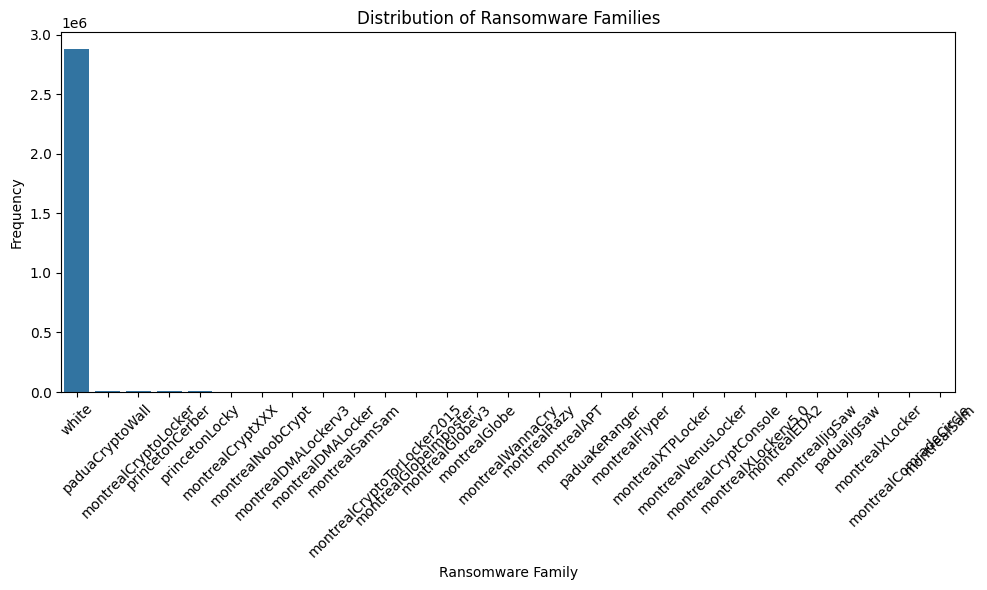

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Ransomware Families")
plt.xlabel("Ransomware Family")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [14]:
# Convert categorical data to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['label'])

# Drop address column for now (not useful for classification)
df_encoded = df_encoded.drop('address', axis=1)

# Example split for future ML:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=[col for col in df_encoded.columns if col.startswith('label_')])
y = df_encoded[[col for col in df_encoded.columns if col.startswith('label_')]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Prepared features and target for ML.")


Prepared features and target for ML.


In [12]:
# Summary of dataset
print(df.info())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Distribution of ransomware labels
print("\nRansomware Family Distribution:\n")
print(df['label'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   address    object 
 1   year       int64  
 2   day        int64  
 3   length     int64  
 4   weight     float64
 5   count      int64  
 6   looped     int64  
 7   neighbors  int64  
 8   income     float64
 9   label      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 222.5+ MB
None

Missing values:
 address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

Ransomware Family Distribution:

label
white                          2875284
paduaCryptoWall                  12390
montrealCryptoLocker              9315
princetonCerber                   9223
princetonLocky                    6625
montrealCryptXXX                  2419
montrealNoobCrypt                  483
montrealDMALockerv3                3